In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [34]:
raw_cityHousing_df = pd.read_csv('City_Zhvi_AllHomes.csv')

In [35]:
countyHP_df = raw_cityHousing_df[['RegionID','SizeRank','RegionName','RegionType','State','Metro','CountyName']]
countyHP_df.columns=['RegionID','SizeRank','RegionName','RegionType','State','Metro','County']
countyHP_df.head()

,RegionID,SizeRank,RegionName,RegionType,State,Metro,County
0,6181,0,New York,City,NY,New York-Newark-Jersey City,Queens County
1,12447,1,Los Angeles,City,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County
2,39051,2,Houston,City,TX,Houston-The Woodlands-Sugar Land,Harris County
3,17426,3,Chicago,City,IL,Chicago-Naperville-Elgin,Cook County
4,6915,4,San Antonio,City,TX,San Antonio-New Braunfels,Bexar County


In [36]:
raw_CountyResults_df = pd.read_csv('countyResults_mlp.csv')

In [37]:
CountyResults_df = raw_CountyResults_df
CountyResults_df.columns = ['CityID', 'Train_Accuracy', 'Test_accuracy', 'Prediction', 'Actual']
CountyResults_df.head()

,CityID,Train_Accuracy,Test_accuracy,Prediction,Actual
0,11671,0.998383,0.993694,186.256414,186.9
1,8097,0.998472,0.994075,401.178073,399.4
2,398300,0.998439,0.994116,100.298627,100.1
3,21159,0.997415,0.990781,146.392802,146.8
4,47847,0.997245,0.988843,221.233191,221.2


In [38]:
merged_df = pd.merge(CountyResults_df, countyHP_df, how='inner', left_on='CityID', right_on='RegionID')
merged_df.head()

,CityID,Train_Accuracy,Test_accuracy,Prediction,Actual,RegionID,SizeRank,RegionName,RegionType,State,Metro,County
0,11671,0.998383,0.993694,186.256414,186.9,11671,137,Grand Rapids,City,MI,Grand Rapids-Wyoming,Kent County
1,8097,0.998472,0.994075,401.178073,399.4,8097,216,Ann Arbor,City,MI,Ann Arbor,Washtenaw County
2,398300,0.998439,0.994116,100.298627,100.1,398300,224,Lansing,City,MI,Lansing-East Lansing,Ingham County
3,21159,0.997415,0.990781,146.392802,146.8,21159,256,Warren,City,MI,Detroit-Warren-Dearborn,Macomb County
4,47847,0.997245,0.988843,221.233191,221.2,47847,265,Sterling Heights,City,MI,Detroit-Warren-Dearborn,Macomb County


In [40]:
countyPredict_df = pd.pivot_table(merged_df, values='Prediction', index=['State','County'], aggfunc=np.mean)
countyPredict_df.head()

Prediction
State County                    
MI    Allegan County  215.635387
      Alpena County   101.476248
      Barry County    191.382115
      Bay County      121.064681
      Berrien County  170.182921

In [41]:
raw_fipsCodes_df = pd.read_csv('FipsCodes.csv')

In [42]:
fipsCodes_df = raw_fipsCodes_df
fipsCodes_df.set_index(['State','County'], inplace=True)
fipsCodes_df.head()

Fips
State County              
AL    Autauga County  1001
      Baldwin County  1003
      Barbour County  1005
      Bibb County     1007
      Blount County   1009

In [63]:
pred_df = pd.merge(countyPredict_df, fipsCodes_df, how='inner', left_index=True, right_index=True)

In [65]:
pred_df['Fips'] = pred_df['Fips'].astype(int)
pred_df.sort_index(inplace=True)
pred_df

Prediction   Fips
State County                                  
MI    Allegan County         215.635387  26005
      Alpena County          101.476248  26007
      Barry County           191.382115  26015
      Bay County             121.064681  26017
      Berrien County         170.182921  26021
      Branch County          116.300174  26023
      Calhoun County         117.481756  26025
      Cass County            152.671500  26027
      Clinton County         203.341677  26037
      Eaton County           154.007712  26045
      Genesee County         165.682922  26049
      Grand Traverse County  241.010879  26055
      Gratiot County          90.485819  26057
      Houghton County         89.105811  26061
      Ingham County          174.846397  26065
      Ionia County           166.186553  26067
      Jackson County         195.824485  26075
      Kalamazoo County       189.131065  26077
      Kent County            250.903048  26081
      Lenawee County         160.127266  26091
      Livingston County      300.700714  26093
      Macomb County          212.126974  26099
      Marquette County       160.864556  26103
      Mason County           127.772669  26105
      Midland County         131.660879  26111
      Monroe County          191.710555  26115
      Montcalm County        129.090385  26117
      Muskegon County        162.503055  26121
      Oakland County         301.437011  26125
      Ottawa County          255.875573  26139
      Saginaw County         134.779822  26145
      Shiawassee County      141.858719  26155
      Van Buren County       148.071368  26159
      Washtenaw County       284.934463  26161
      Wayne County           219.798217  26163

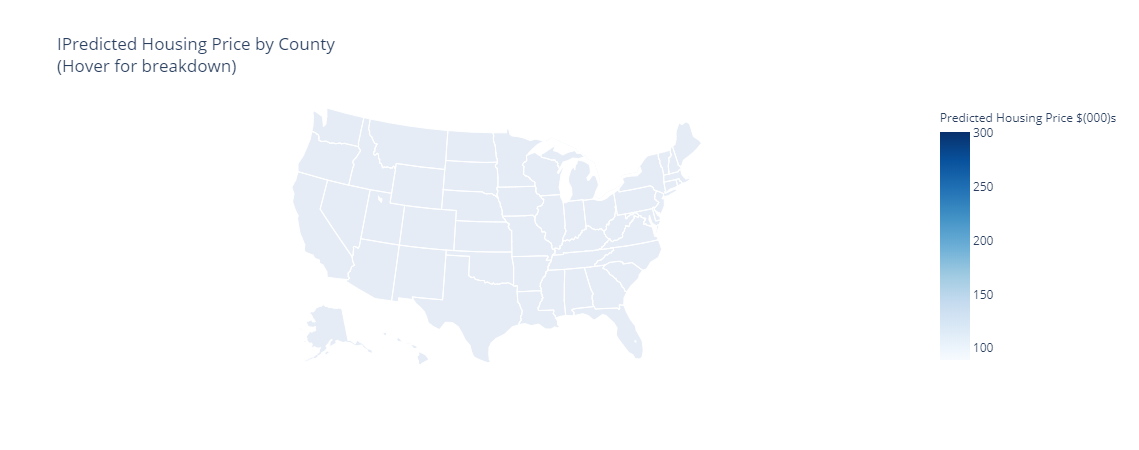

In [61]:
fig = go.Figure(data=go.Choropleth(
        locations=pred_df['Fips'],
        z=pred_df['Prediction'].astype(float),
        locationmode='geojson-id',
        colorscale='Blues',
        autocolorscale=False,
        text=pred_df.index, # hover text
        marker_line_color='white', # line markers between states
        colorbar_title='Predicted Housing Price $(000)s '
        scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    ))
fig.update_layout(
        title_text='IPredicted Housing Price by County <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=go.layout.geo.Projection(type = 'albers usa'),
            showlakes=True, # lakes
            lakecolor='rgb(255, 255, 255)'),
    )

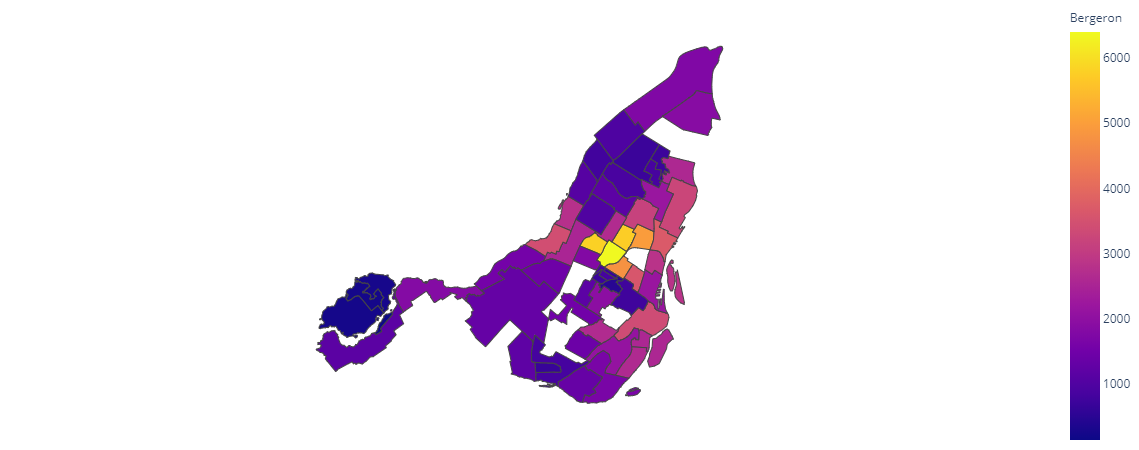

In [73]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [78]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [98]:
#with open('map.geojson') as f:
#    fipmap = json.load(f) 
geojson = px.data.election_geojson()

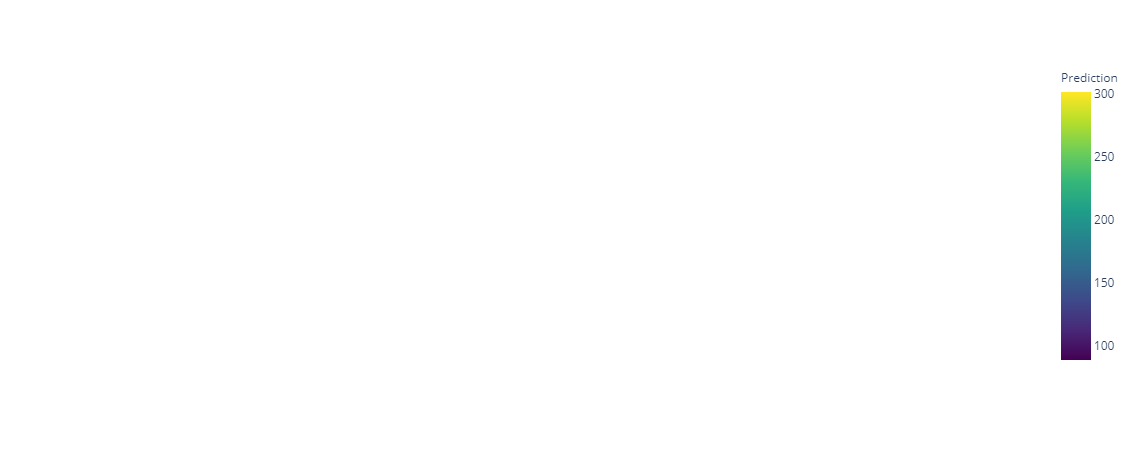

In [100]:
fig = px.choropleth(pred_df, 
                    geojson=geojson, 
                    locations='Fips', 
                    color='Prediction',
                    color_continuous_scale="Viridis",                           
            )
fig.update_geos(fitbounds="geojson", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()